In [1]:
import pandas as pd

df = pd.read_csv("week3_policy_data.csv")
df.head()

,Country,%Renewable,CO2_per_capita,Region,Apply_Policy
0,Nepal,88,1.2,Asia,yes
1,Kenya,65,1.8,Africa,yes
2,Germany,45,6.5,Europe,no
3,India,25,1.9,Asia,yes
4,Australia,35,17.0,Oceania,no


In [2]:
df["Label"] = df["Apply_Policy"].map({"yes": 1, "no": 0})


In [3]:
df["Label"] = df["Apply_Policy"].map({"yes": 1, "no": 0})

In [4]:
df[["Country", "Label"]]

,Country,Label
0,Nepal,1
1,Kenya,1
2,Germany,0
3,India,1
4,Australia,0
5,Brazil,1
6,Nigeria,1
7,Sweden,0
8,Bangladesh,1
9,USA,0


In [5]:
from sklearn.tree import DecisionTreeClassifier

X = df[["%Renewable", "CO2_per_capita"]]
y = df["Label"]

tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=0)

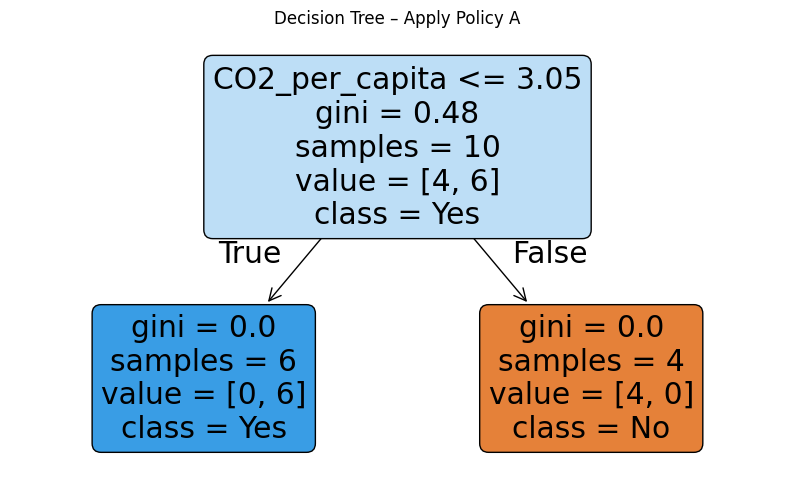

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_tree(tree, feature_names=X.columns, class_names=["No", "Yes"], filled=True, rounded=True)
plt.title("Decision Tree – Apply Policy A")
plt.show()

In [7]:
new_data = pd.DataFrame({
    "%Renewable": [52, 20, 75],
    "CO2_per_capita": [1.5, 2.5, 3.0]
})

predictions = tree.predict(new_data)
print(predictions)

[1 1 1]


In [8]:

# Week 4 – Counting Principles in Python

import math
from itertools import permutations, combinations

# Step 1: Factorial – Total ways to arrange 5 strategies
print("Step 1 – Factorial:")
print("5! =", math.factorial(5))

# Step 2: Permutations – How many ways to apply 3 out of 5 strategies (order matters)
print("\nStep 2 – Permutations (nPr):")
n, r = 5, 3
perm_result = math.perm(n, r)  # Requires Python 3.8+
print(f"Permutations of {n} items taken {r} at a time: {perm_result}")

# Step 3: Combinations – How many ways to choose 3 strategies (order doesn't matter)
print("\nStep 3 – Combinations (nCr):")
comb_result = math.comb(n, r)
print(f"Combinations of {n} items taken {r} at a time: {comb_result}")

# Step 4: List actual combinations
strategies = ['Solar', 'Wind', 'Hydro', 'Geothermal', 'Biomass']
print("\nAll 3-strategy combinations (unordered):")
for combo in combinations(strategies, 3):
    print(combo)

# Step 5: List actual permutations
print("\nAll 3-strategy permutations (ordered):")
for perm in permutations(strategies, 3):
    print(perm)
    break  # remove this line to view all permutations


Step 1 – Factorial:
5! = 120

Step 2 – Permutations (nPr):
Permutations of 5 items taken 3 at a time: 60

Step 3 – Combinations (nCr):
Combinations of 5 items taken 3 at a time: 10

All 3-strategy combinations (unordered):
('Solar', 'Wind', 'Hydro')
('Solar', 'Wind', 'Geothermal')
('Solar', 'Wind', 'Biomass')
('Solar', 'Hydro', 'Geothermal')
('Solar', 'Hydro', 'Biomass')
('Solar', 'Geothermal', 'Biomass')
('Wind', 'Hydro', 'Geothermal')
('Wind', 'Hydro', 'Biomass')
('Wind', 'Geothermal', 'Biomass')
('Hydro', 'Geothermal', 'Biomass')

All 3-strategy permutations (ordered):
('Solar', 'Wind', 'Hydro')


In [9]:

# Week 4 – Combinatorics in Python

import math
from itertools import permutations, combinations

# Step 1: Define energy strategies
strategies = ['Solar', 'Wind', 'Hydro', 'Geothermal', 'Biomass']
print("Available strategies:", strategies)

# Step 2: How many combinations of 3 strategies (order doesn't matter)?
n = len(strategies)
r = 3
print("\nCombinations (nCr):")
print(f"From {n} strategies, choosing {r} gives:", math.comb(n, r))

# Step 3: How many permutations of 3 strategies (order matters)?
print("\nPermutations (nPr):")
print(f"From {n} strategies, arranging {r} gives:", math.perm(n, r))

# Step 4: List all combinations
print("\nAll possible combinations of 3 strategies:")
for combo in combinations(strategies, r):
    print(combo)

# Step 5: List first 5 permutations
print("\nSample permutations of 3 strategies (first 5 only):")
for i, perm in enumerate(permutations(strategies, r)):
    print(perm)
    if i == 4:
        break


Available strategies: ['Solar', 'Wind', 'Hydro', 'Geothermal', 'Biomass']

Combinations (nCr):
From 5 strategies, choosing 3 gives: 10

Permutations (nPr):
From 5 strategies, arranging 3 gives: 60

All possible combinations of 3 strategies:
('Solar', 'Wind', 'Hydro')
('Solar', 'Wind', 'Geothermal')
('Solar', 'Wind', 'Biomass')
('Solar', 'Hydro', 'Geothermal')
('Solar', 'Hydro', 'Biomass')
('Solar', 'Geothermal', 'Biomass')
('Wind', 'Hydro', 'Geothermal')
('Wind', 'Hydro', 'Biomass')
('Wind', 'Geothermal', 'Biomass')
('Hydro', 'Geothermal', 'Biomass')

Sample permutations of 3 strategies (first 5 only):
('Solar', 'Wind', 'Hydro')
('Solar', 'Wind', 'Geothermal')
('Solar', 'Wind', 'Biomass')
('Solar', 'Hydro', 'Wind')
('Solar', 'Hydro', 'Geothermal')


In [10]:

# Week 4 – Categorical Feature Engineering Activity

import pandas as pd
from itertools import product

# Step 1: Define regions and energy types
regions = ['Asia', 'Africa', 'Europe']
energy_types = ['Solar', 'Wind', 'Hydro']

# Step 2: Create Cartesian product (all region-energy combinations)
combos = list(product(regions, energy_types))

# Step 3: Create a DataFrame
df = pd.DataFrame(combos, columns=['region', 'energy_type'])

# Step 4: Create a combined feature
df['region_energy'] = df['region'] + "_" + df['energy_type']

# Step 5: Display the resulting DataFrame
print("Engineered Feature Table:")
print(df)


Engineered Feature Table:
   region energy_type region_energy
0    Asia       Solar    Asia_Solar
1    Asia        Wind     Asia_Wind
2    Asia       Hydro    Asia_Hydro
3  Africa       Solar  Africa_Solar
4  Africa        Wind   Africa_Wind
5  Africa       Hydro  Africa_Hydro
6  Europe       Solar  Europe_Solar
7  Europe        Wind   Europe_Wind
8  Europe       Hydro  Europe_Hydro


In [11]:

# Week 4 – Box Plot Visualization for Categorical Features

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Step 1: Simulated dataset
regions = ['Asia', 'Africa', 'Europe']
energy_types = ['Solar', 'Wind', 'Hydro']

# Generate combinations
data = []
for region in regions:
    for energy in energy_types:
        for _ in range(10):  # 10 data points per category
            co2 = random.gauss(mu=5 if energy == 'Hydro' else 3, sigma=1.5)
            data.append([region, energy, round(max(co2, 0.2), 2)])  # Ensure no negative emissions

df = pd.DataFrame(data, columns=['region', 'energy_type', 'co2_emissions'])

# Step 2: Create new combined category
df['region_energy'] = df['region'] + "_" + df['energy_type']

# Step 3: Plot box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='region_energy', y='co2_emissions')
plt.title("CO₂ Emissions by Region + Energy Strategy")
plt.xticks(rotation=45)
plt.ylabel("CO₂ Emissions (tonnes per capita)")
plt.xlabel("Region and Energy Type")
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'seaborn'

In [12]:
!pip3 install seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip


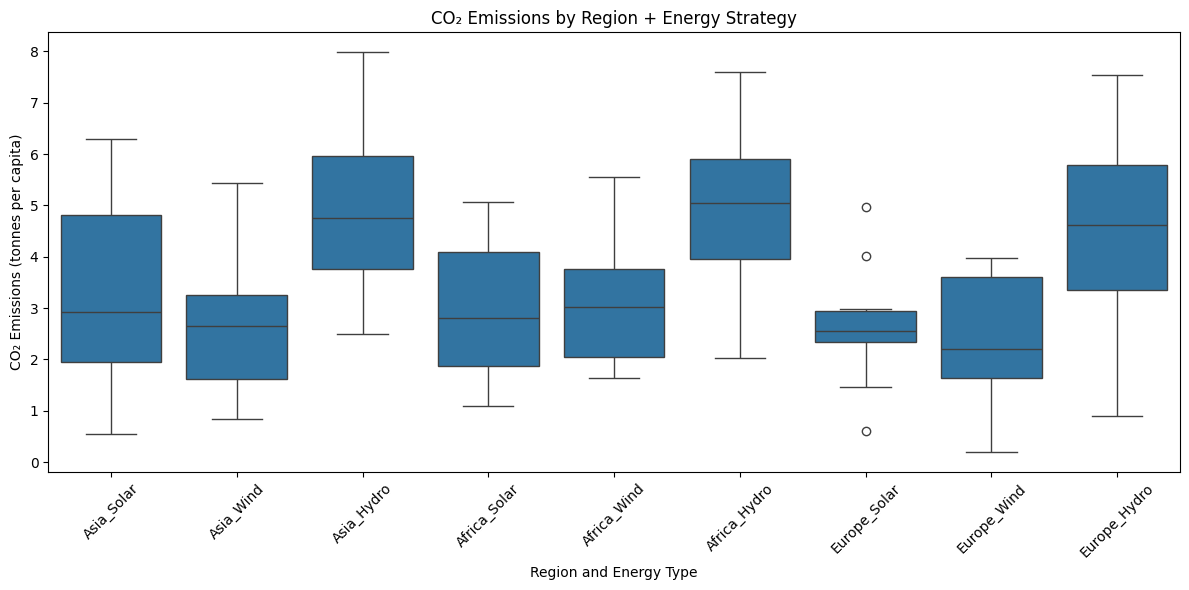

In [13]:

# Week 4 – Box Plot Visualization for Categorical Features

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Step 1: Simulated dataset
regions = ['Asia', 'Africa', 'Europe']
energy_types = ['Solar', 'Wind', 'Hydro']

# Generate combinations
data = []
for region in regions:
    for energy in energy_types:
        for _ in range(10):  # 10 data points per category
            co2 = random.gauss(mu=5 if energy == 'Hydro' else 3, sigma=1.5)
            data.append([region, energy, round(max(co2, 0.2), 2)])  # Ensure no negative emissions

df = pd.DataFrame(data, columns=['region', 'energy_type', 'co2_emissions'])

# Step 2: Create new combined category
df['region_energy'] = df['region'] + "_" + df['energy_type']

# Step 3: Plot box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='region_energy', y='co2_emissions')
plt.title("CO₂ Emissions by Region + Energy Strategy")
plt.xticks(rotation=45)
plt.ylabel("CO₂ Emissions (tonnes per capita)")
plt.xlabel("Region and Energy Type")
plt.tight_layout()
plt.show()
